In [153]:
import sys
import tweepy
from textblob import TextBlob
from datetime import datetime, timedelta
from collections import OrderedDict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

In [42]:
api_key = 'H5z154wpQSziVJVCoc3TxHUtO'
#client_key = 'WTlsdjkxalhfOW5QbU1wVzA5Rnk6MTpjaQ'
api_secret = 'HJAkwH9LZVn7BiFCllAppG2psVcMG5pCLlc92Q9G1NpUQWEtU9'
#client_secret = 'ysBVKgt4HPp31f_s-CFVh9a9pbOAZpDGVsltmWbmGhhgobmpvA'

access_token = '1569474881196277760-ylmgGT0tKr9Vakbqfn5oQXxAVJLpaY'
access_secret = 'dJ1BNQKgoWGvZUw3sWK5mntLIPr2wZwieI3CLLoqPtZ34'

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,wait_on_rate_limit = True)

In [210]:
noOfTweet = 50000

In [211]:
dates =['2022-10-'+str(i).zfill(2) for i in range(5,14)]

In [212]:
polarity = []
polarity2 = []
time_stamp = []
for i in range(len(dates)-1):
    tag = 'Fetterman since:'+ dates[i] +' until:'+ dates[i+1]
    tweets = api.search_tweets(q=tag, count = noOfTweet)
    pol = 0
    for tweet in tweets:
        remove_rt = re.sub('RT @\w+: '," ",tweet.text)
        rt = re.sub("(@[A-Za-z0–9]+)|(\w+:\/\/\S+)"," ",remove_rt)
        text = rt.lower()
        analysis = TextBlob(text)
        pol += analysis.sentiment.polarity
    polarity.append(pol)
    time_stamp.append(dates[i][-2:])
    tag2 = 'Mehmet OR Mehmet Oz since:'+ dates[i] +' until:'+ dates[i+1]
    tweets2 = api.search_tweets(q=tag2, count = noOfTweet)
    pol2 = 0
    for tweet in tweets2:
        remove_rt = re.sub('RT @\w+: '," ",tweet.text)
        rt = re.sub("(@[A-Za-z0–9]+)|(\w+:\/\/\S+)"," ",remove_rt)
        text = rt.lower()
        analysis = TextBlob(text)
        pol2 += analysis.sentiment.polarity
    polarity2.append(pol2)
    

In [213]:
fet_poll = [47.4,47.1,47.0,46.2,46.0]
Mehmet_poll = [43.3,43.1,42.7,42.4,42.3]

In [214]:
result = pd.DataFrame(OrderedDict( {
            'Date': time_stamp[:-3]
         , 'Polarity_Fetterman': polarity[:-3]
         , 'Polarity_Mehmet': polarity2[:-3]
         , 'Poll_Fetterman': fet_poll
         , 'Poll_Mehmet' : Mehmet_poll
         }))

In [215]:
result

,Date,Polarity_Fetterman,Polarity_Mehmet,Poll_Fetterman,Poll_Mehmet
0,05,1.526824,-6.613317,47.4,43.3
1,06,15.402624,29.568434,47.1,43.1
2,07,7.259208,-0.885103,47.0,42.7
3,08,7.891281,-8.488095,46.2,42.4
4,09,3.193845,-1.930303,46.0,42.3


In [216]:
print("Fetterman correlation: ",'{:.2%}'.format(np.corrcoef(polarity[:-3],fet_poll)[0][1]))

Fetterman correlation:  13.90%


In [217]:
print("Mehmet correlation",'{:.2%}'.format(np.corrcoef(polarity2[:-3],Mehmet_poll)[0][1]))

Mehmet correlation 38.85%


<AxesSubplot:xlabel='Date'>

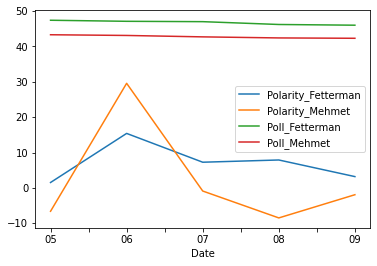

In [221]:
result.plot(x = 'Date')#.plot(ax=plt.gca().twinx(), color="C1")